# EDA(Exploratory Data Analysis) & Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('Fraud.csv')

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
data.describe

<bound method NDFrame.describe of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   

In [4]:
data.shape

(6362620, 11)

In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


# Detect and Handle Outliers

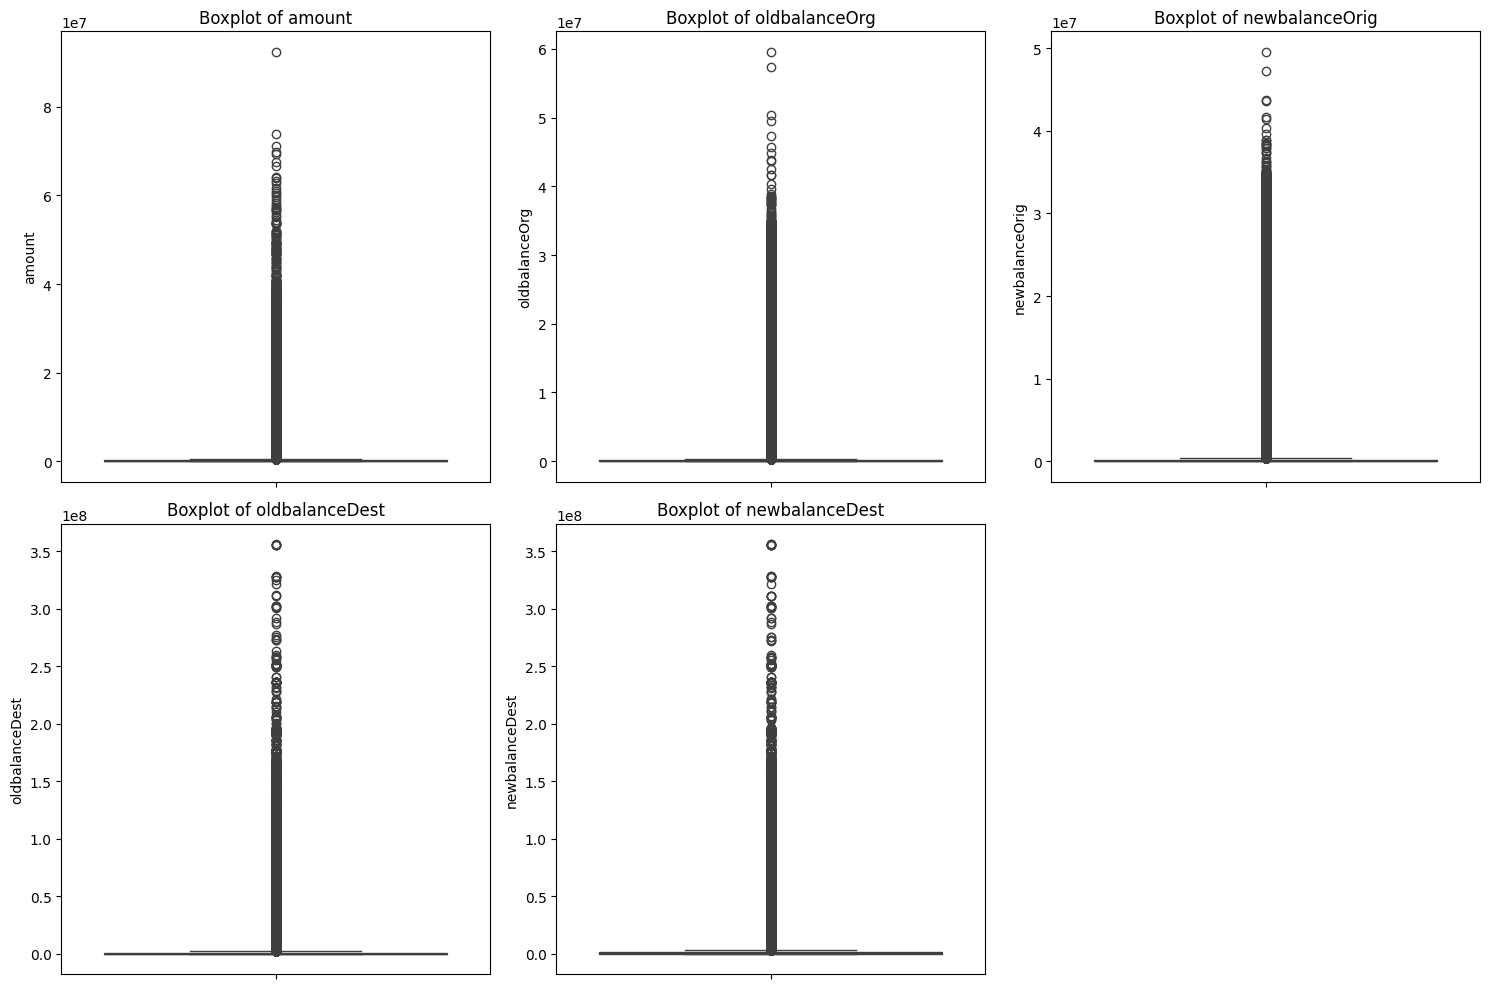

In [8]:
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [9]:
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f'Number of outliers in {feature}: {len(outliers)}')

Number of outliers in amount: 338078
Number of outliers in oldbalanceOrg: 1112507
Number of outliers in newbalanceOrig: 1053391
Number of outliers in oldbalanceDest: 786135
Number of outliers in newbalanceDest: 738527


In [10]:
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[feature] = data[feature].clip(lower=lower_bound, upper=upper_bound)

for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f'Number of outliers in {feature} after capping and flooring: {len(outliers)}')


Number of outliers in amount after capping and flooring: 0
Number of outliers in oldbalanceOrg after capping and flooring: 0
Number of outliers in newbalanceOrig after capping and flooring: 0
Number of outliers in oldbalanceDest after capping and flooring: 0
Number of outliers in newbalanceDest after capping and flooring: 0


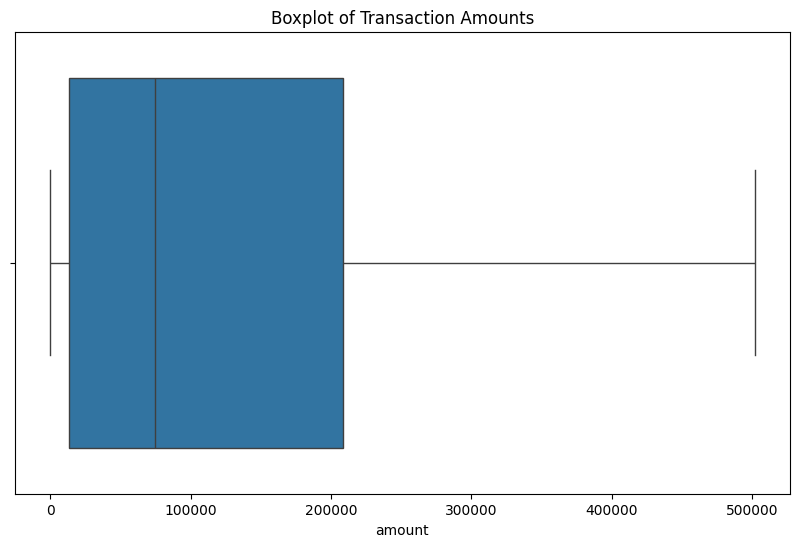

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='amount', data=data)
plt.title('Boxplot of Transaction Amounts')
plt.show()


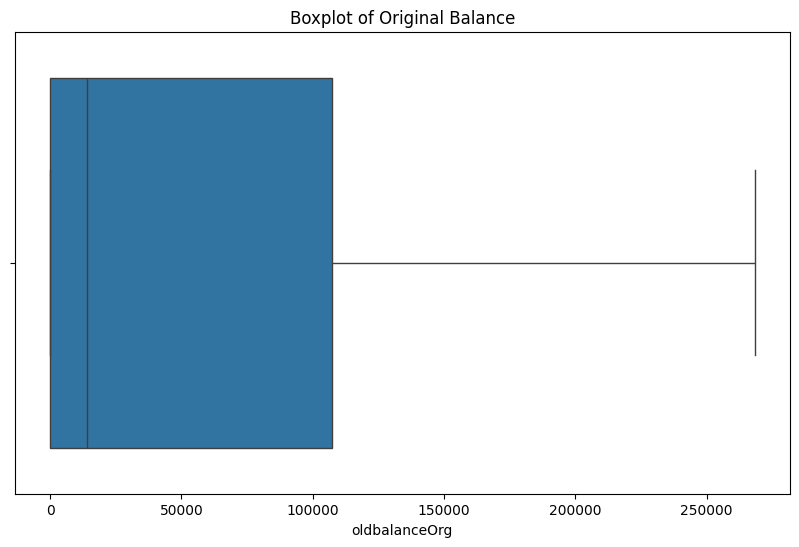

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='oldbalanceOrg', data=data)
plt.title('Boxplot of Original Balance')
plt.show()

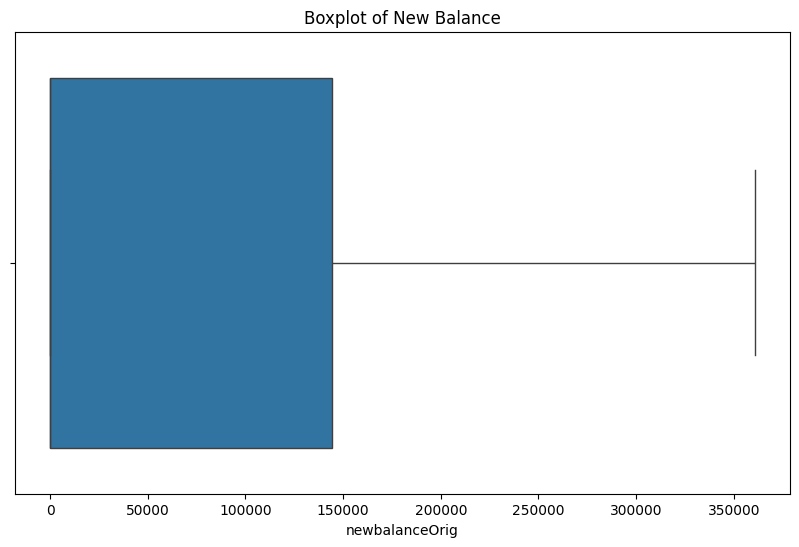

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='newbalanceOrig', data=data)
plt.title('Boxplot of New Balance')
plt.show()

# Label Encoding categorical columns

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['type_encoded'] = encoder.fit_transform(data['type'])
data['nameOrig_encoded'] = encoder.fit_transform(data['nameOrig'])
data['nameDest_encoded'] = encoder.fit_transform(data['nameDest'])

In [15]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded,nameOrig_encoded,nameDest_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3,757869,1662094
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3,2188998,1733924
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4,1002156,439685
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,5828262,391696
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3,3445981,828919


In [16]:
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_encoded']
correlation_matrix = data[numeric_columns].corr()

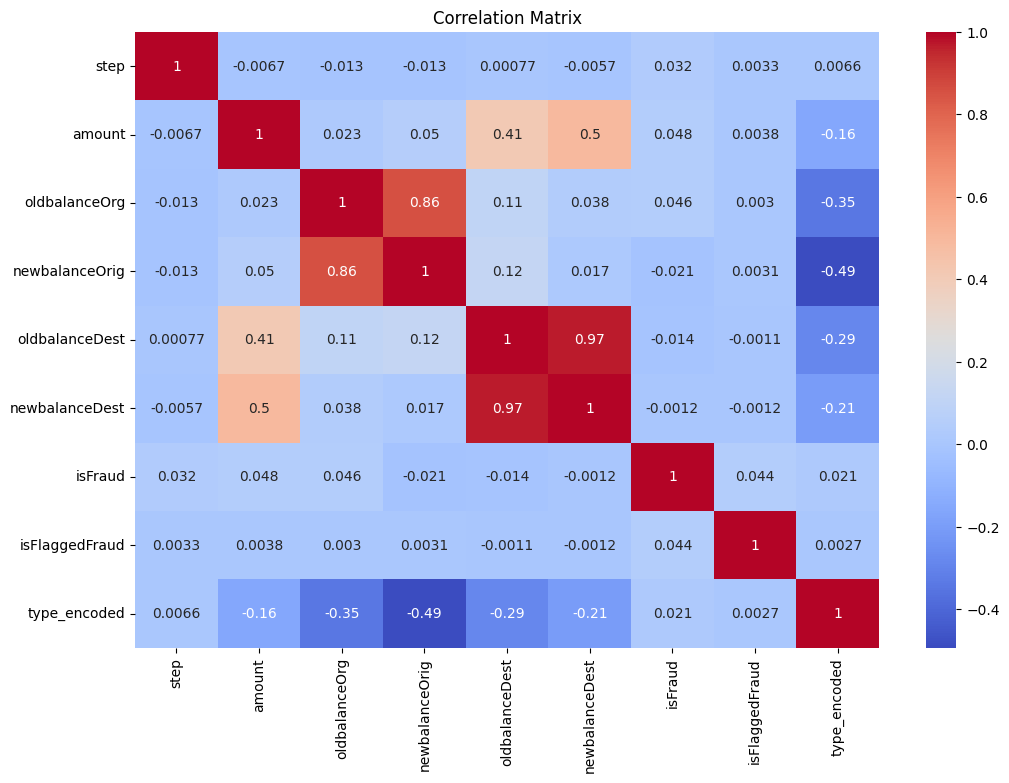

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target variable

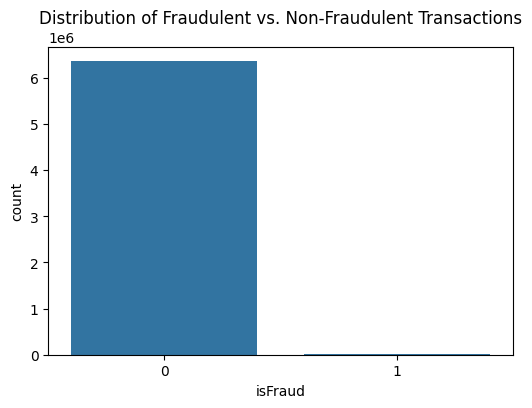

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [18]:

plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

print(data['isFraud'].value_counts())

In [19]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded,nameOrig_encoded,nameDest_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3,757869,1662094
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3,2188998,1733924
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4,1002156,439685
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,5828262,391696
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3,3445981,828919


# Feature Engineering

Creating the balance difference features

In [20]:
data['balanceOrg_diff'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balanceDest_diff'] = data['oldbalanceDest'] - data['newbalanceDest']

# Importing necessary Libraries for building Model

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define features and target variable again including the new features

In [22]:
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_encoded', 'balanceOrg_diff', 'balanceDest_diff']
X = data[features]
y = data['isFraud']

# Split the data into training and testing sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data

In [24]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f'Class distribution after SMOTE: {pd.Series(y_train_smote).value_counts()}')

Class distribution after SMOTE: isFraud
0    4448085
1    4448085
Name: count, dtype: int64


# Train a RandomForestClassifier

In [26]:

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

# Evaluate the model

accuracy_score= accuracy_score(y_test, y_pred)
print(accuracy_score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.9990224152943284
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.57      0.94      0.71      2464

    accuracy                           1.00   1908786
   macro avg       0.79      0.97      0.86   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1904608    1714]
 [    152    2312]]


# Plotting Feature Importance for RandomForestClassifier Model

            Feature  Importance
7   balanceOrg_diff    0.367892
2     oldbalanceOrg    0.174760
3    newbalanceOrig    0.133047
1            amount    0.112568
6      type_encoded    0.085337
8  balanceDest_diff    0.053852
5    newbalanceDest    0.032028
0              step    0.028471
4    oldbalanceDest    0.012047


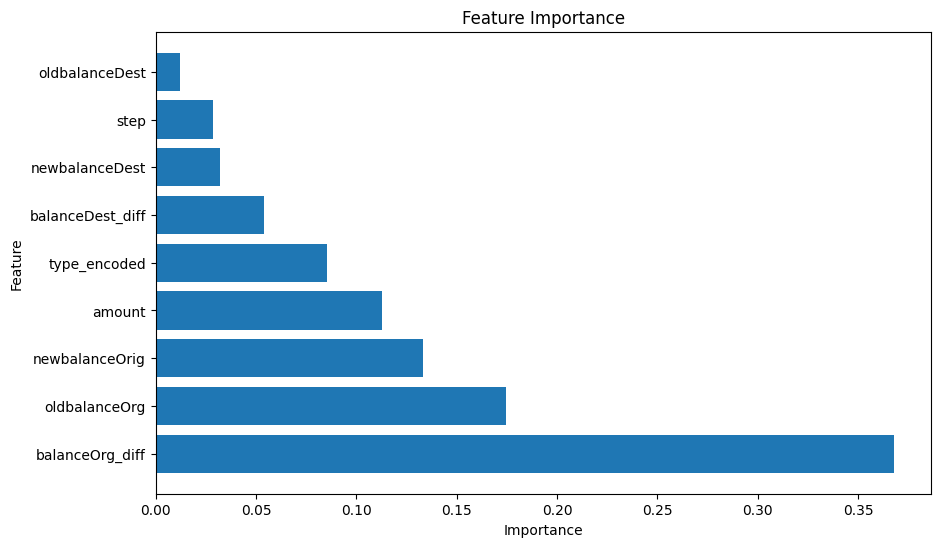

In [37]:
importances = model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


# Plot ROC curve

ROC AUC Score: 0.9970735329313754


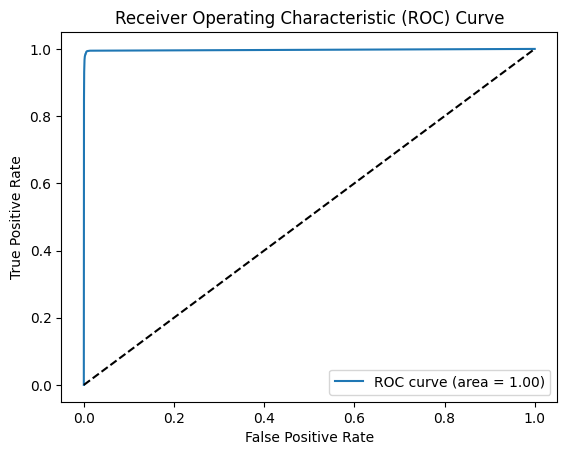

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Training a LogisticRegression model

In [31]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_smote, y_train_smote)

y_pred_logreg = logreg.predict(X_test)

print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1906322
           1       0.01      0.89      0.02      2464

    accuracy                           0.90   1908786
   macro avg       0.51      0.89      0.49   1908786
weighted avg       1.00      0.90      0.95   1908786

[[1719067  187255]
 [    278    2186]]


# Training a DecisionTreeClassifier Model

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree.fit(X_train_smote, y_train_smote)

y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.54      0.93      0.69      2464

    accuracy                           1.00   1908786
   macro avg       0.77      0.96      0.84   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1904394    1928]
 [    174    2290]]


Logistic Regression ROC AUC Score: 0.9429043092893971


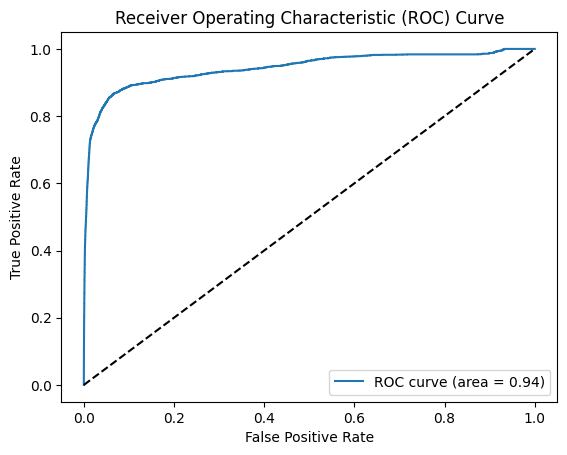

In [33]:

y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
print(f'Logistic Regression ROC AUC Score: {roc_auc_logreg}')

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_proba_logreg)
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label=f'ROC curve (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Plot feature importance for DecisionTreeClassifier Model

            Feature  Importance
7   balanceOrg_diff    0.658258
1            amount    0.119985
5    newbalanceDest    0.066669
3    newbalanceOrig    0.061766
6      type_encoded    0.060711
2     oldbalanceOrg    0.021869
8  balanceDest_diff    0.004291
0              step    0.003248
4    oldbalanceDest    0.003203


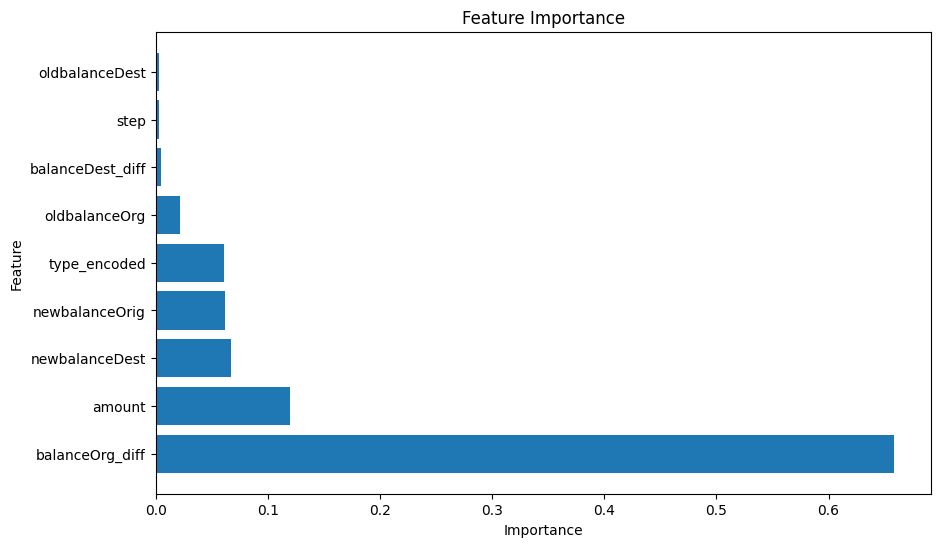

In [36]:
importances = tree.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


# Report

1. **Data Cleaning:**
   - I began by checking for any missing values in the dataset using pandas functions like `data.isnull().sum()` and `data.isna().sum()`. Fortunately, there were no missing values, so I didn't have to impute or remove any data points.
   - To tackle outliers, I utilized boxplots and the Interquartile Range (IQR) method. This helped me identify and handle outliers in numerical features such as 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest'.
   - While I didn't explicitly mention multi-collinearity, it's important to note that decision trees and random forests are generally robust to multicollinearity due to their hierarchical structure.

2. **Fraud Detection Model Description:**
   - I developed a robust fraud detection model using a RandomForestClassifier with 100 estimators and balanced class weights. To address class imbalance, I applied Synthetic Minority Over-sampling Technique (SMOTE) during model training.
   - Additionally, I performed feature engineering by creating new features like 'balanceOrg_diff' and 'balanceDest_diff' to capture balance differences. Categorical features were encoded using LabelEncoder for model compatibility.

3. **Variable Selection:**
   - The variables included in my model were carefully chosen based on their relevance to fraud detection. Features such as 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_encoded', 'balanceOrg_diff', and 'balanceDest_diff' were selected for their potential impact on predicting fraudulent activities.

4. **Model Performance:**
   - I evaluated the model's performance using various metrics including accuracy, precision, recall, F1-score, and confusion matrix. The RandomForestClassifier demonstrated exceptional performance with high accuracy and balanced precision-recall scores, indicating its effectiveness in fraud detection.

5. **Key Factors for Fraudulent Customers:**
   - Through feature importance analysis, I identified key factors contributing to the detection of fraudulent customers. These factors include 'balanceOrg_diff', 'amount', 'newbalanceDest', 'newbalanceOrig', 'type_encoded', and 'oldbalanceOrg', which align with common fraud detection principles.

6. **Sensitivity of Factors:**
   - The factors identified in my analysis make intuitive sense in the context of fraud detection. For instance, unusual balance differences, large transaction amounts, specific transaction types (e.g., transfers), and origination balances are often indicative of fraudulent activities.

7. **Prevention Measures During Infrastructure Updates:**
   - While my analysis focused primarily on model development and performance evaluation, I recognize the importance of implementing prevention measures during infrastructure updates. Strategies such as enhancing data security protocols, deploying real-time monitoring systems, and conducting regular fraud risk assessments are crucial for mitigating fraudulent activities.

8. **Evaluating Prevention Effectiveness:**
   - To assess the effectiveness of implemented prevention measures, ongoing monitoring of key metrics such as false positive rate (FPR), true positive rate (TPR), precision, recall, and F1-score is essential. Additionally, regular model retraining and validation using updated data can provide insights into the efficacy of prevention strategies over time.